### Reading the CSV files and representing them in the form of a DataFrame using Pandas

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
import pandas as pd

In [2]:
df_train = pd.read_csv('train_features.csv')
df_train.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [3]:
df_train.shape

(1000113, 8)

In [4]:
df_salaries = pd.read_csv('train_salaries.csv')
df_salaries.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [5]:
df_salaries.shape

(1000069, 2)

## Data Exploration

In [8]:
# We have 6 categorical Variables and 2 Continous Variables
df_train.dtypes  

jobId                  object
companyId              object
jobType                object
degree                 object
major                  object
industry               object
yearsExperience         int64
milesFromMetropolis     int64
dtype: object

#### Checking for Missing/Duplicate Values

In [9]:
df_train.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64

In [10]:
df_train.isnull().values.any() # We see that there are no missing values in the train data set

False

In [11]:
df_salaries.isnull().values.any() # There seems to be no missing values in the salaries data set

False

In [12]:
df_train.jobId.nunique() # Given that JobId is an unqie indentifier, we see that there are 1 million unique JOB Id's

1000000

In [13]:
df_salaries.jobId.nunique() # we see that there are salaries for 1 million unique job Ids 

1000000

In [14]:
Dupe_train = df_train.jobId.duplicated().sum()
print('The number of duplicate records in the train data set : ', Dupe_train)

The number of duplicate records in the train data set :  113


In [15]:
Dupe_salaries = df_salaries.jobId.duplicated().sum()
print('The number of duplicate records in the salaries data set : ', Dupe_salaries)

The number of duplicate records in the salaries data set :  69


In [16]:
unique_train =  df_train.drop_duplicates()      #dropping the duplicated records from both the data sets
unique_salaries = df_salaries.drop_duplicates()

In [17]:
unique_train.shape

(1000000, 8)

In [18]:
unique_salaries.shape

(1000000, 2)

#### Data Visualization

,salary
count,1000000.000000
mean,116.061818
std,38.717936
min,0.000000
25%,88.000000
50%,114.000000
75%,141.000000
max,301.000000


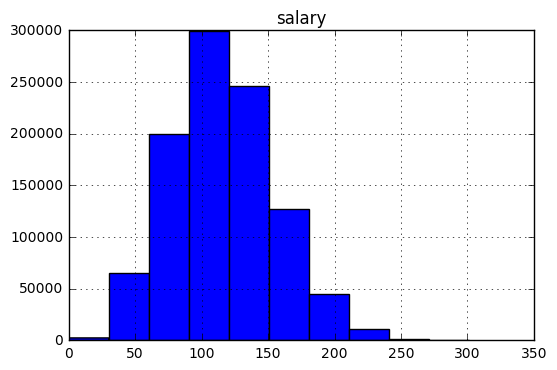

In [19]:
#Checking out the distribution for the target variable
import matplotlib.pyplot as plt
%matplotlib inline

unique_salaries.hist() 
unique_salaries.describe()

##### We see that the response variable seems to be normally distributed, hence there would be no need to transform it in any way

In [20]:
unique_salaries.loc[unique_salaries['salary'] == 0] 

,jobId,salary
30559,JOB1362684438246,0
495984,JOB1362684903671,0
652145,JOB1362685059763,0
816198,JOB1362685223816,0
828225,JOB1362685235843,0


#### We see that the above jobIds have a salary of zero which represents the outliers

In [21]:
 # Droppping records with 0 salary
unique_salaries = unique_salaries[unique_salaries.salary != 0]

C:\Users\Shrinivas Kallol\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  app.launch_new_instance()


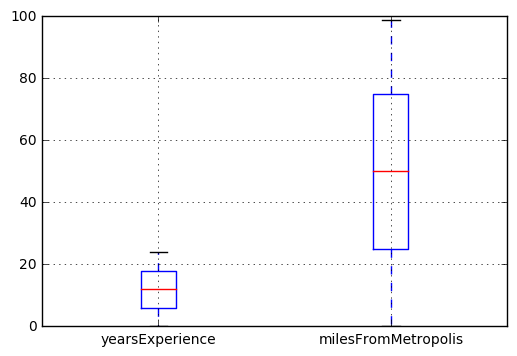

In [22]:
# Exploring the two continuous Variables
numerical_var=unique_train[['yearsExperience', 'milesFromMetropolis']] ## For numerical features
numerical_var.boxplot()
plt.show()

In [23]:
unique_train.describe()

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,11.992386,49.529260
std,7.212391,28.877733
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


In [24]:
# Merging train and salary data sets on JOBId
train_merged = pd.merge(unique_train, unique_salaries, on = 'jobId') 

## Feature Engineering

#### Label Encoding Categorical variables

In [25]:
from sklearn.preprocessing import LabelEncoder
encode = [ 'jobType', 'degree', 'major', 'industry']

for x in encode:
    label = LabelEncoder()
    train_merged[x] = label.fit_transform(train_merged[x])

#### Determining the Feature importance using Lasso

In [26]:
X = train_merged[['jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis']]

In [27]:
Y = train_merged['salary']

In [69]:
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, RandomizedLasso)

lasso = Lasso(alpha=.05)
FeatureImpt = lasso.fit(X, Y)
colnames = X.columns
importances = lasso.coef_
print(np.abs(lasso.coef_), colnames)


    degree  industry  jobType     major  milesFromMetropolis  yearsExperience
0  4.36778  1.664191   3.98159  3.36477             0.400087          2.01278


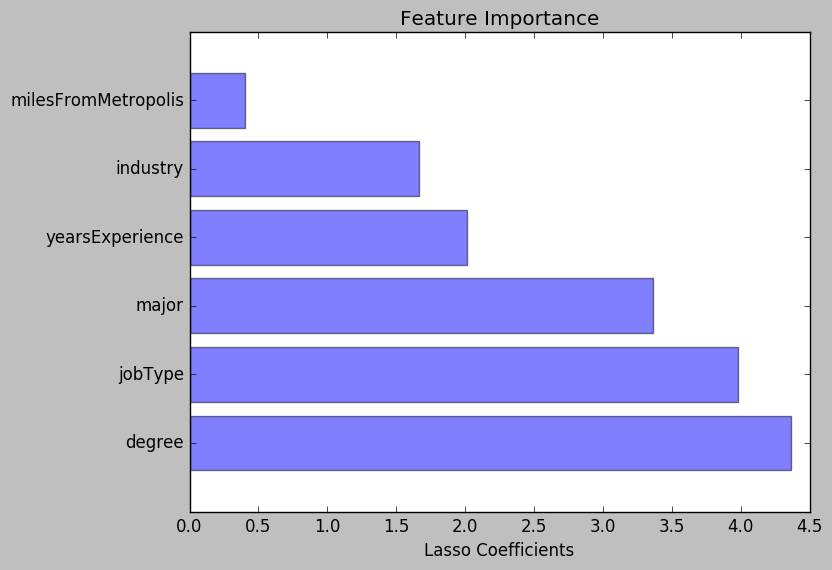

In [85]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('degree', 'jobType', 'major', 'yearsExperience', 'industry', 'milesFromMetropolis')
y_pos = np.arange(len(objects))
performance = [4.36778,3.98159,3.36477,2.01278,1.664191,0.400087]
 
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Lasso Coefficients')
plt.title('Feature Importance')
 
plt.show()

#### Normalizing the continous variables 'yearsExperience' & 'milesFromMetropolis' to bring them on the same footing 

In [28]:

X['yearsExperience'] = (X['yearsExperience'] - X['yearsExperience'].min()) /  (X['yearsExperience'].max() - X['yearsExperience'].min())
X['milesFromMetropolis'] = (X['milesFromMetropolis'] - X['milesFromMetropolis'].min()) /  (X['milesFromMetropolis'].max() - X['milesFromMetropolis'].min())


C:\Users\Shrinivas Kallol\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Shrinivas Kallol\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [115]:
covar = train_merged[['yearsExperience','milesFromMetropolis', 'salary' ]]
print(covar.corr())
# There is a positive co-relation between salary and yearsExperience  
# There is a strong Negative co-relation between salary and milesFromMetropolis         

                     yearsExperience  milesFromMetropolis    salary
yearsExperience             1.000000             0.000672  0.375013
milesFromMetropolis         0.000672             1.000000 -0.297686
salary                      0.375013            -0.297686  1.000000


From the above covariance Matrix we can infer that:
1. There is a positive co-relation between salary and yearsExperience (Usually higher salaries correspond to higher work experience)
2. There is a strong Negative co-relation between salary and milesFromMetropolis ( As we tend to go far from the metropolis the salary offered reduces)   

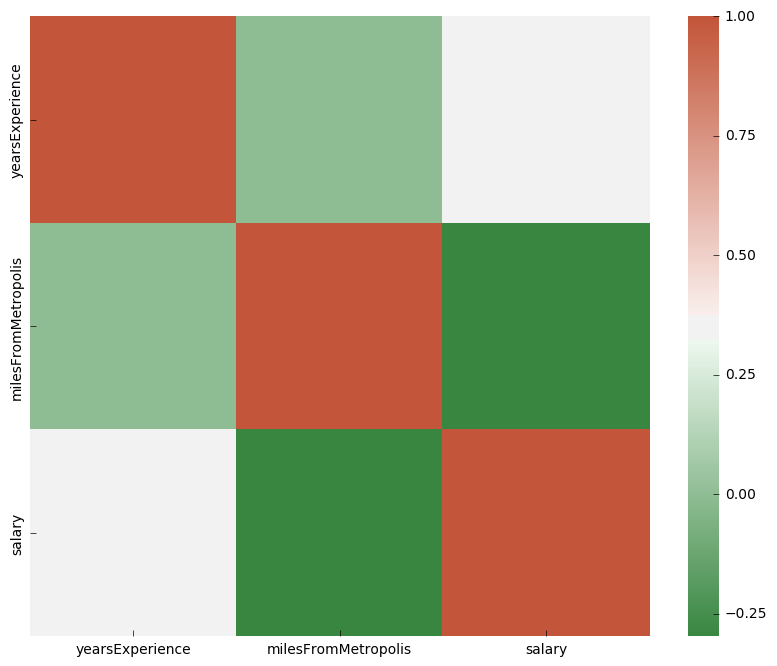

In [116]:
import seaborn as sns
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(10, 8))
corr = covar.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(850, 20, as_cmap=True),
            square=True, ax=ax)

## Modelling to predict Salaries

### Gradient Boosting Regressor

In [40]:
import math
from sklearn.metrics import mean_squared_error
import sklearn.cross_validation
from sklearn import ensemble
import numpy
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
clf = ensemble.GradientBoostingRegressor(n_estimators = 700, max_depth = 5,
          learning_rate = .1, loss = 'ls', verbose=3, random_state=99)

In [46]:
kfold = KFold(n_splits=5, random_state=99)
results = cross_val_score(clf, X, Y, cv=kfold, scoring='negative_mean_squared_error')
print("Results: %.2f (%.2f) MSE" % (-results.mean(), results.std()))

      Iter       Train Loss   Remaining Time 
         1        1336.8698           15.11m
         2        1205.0910           15.36m
         3        1096.9519           14.95m
         4        1005.9484           14.82m
         5         930.0494           14.44m
         6         866.8951           14.20m
         7         813.3798           14.36m
         8         768.3653           14.43m
         9         729.6607           14.35m
        10         696.3086           14.25m
        11         666.9043           14.19m
        12         641.5428           14.12m
        13         619.5064           14.11m
        14         600.2192           14.07m
        15         581.3844           14.05m
        16         566.4599           14.25m
        17         551.8743           14.19m
        18         539.1515           14.13m
        19         527.5477           14.17m
        20         517.9059           14.10m
        21         508.9256           14.05m
        2

In [89]:
#Paramters obtained from Randomized grid search
import math
from sklearn.metrics import mean_squared_error
import sklearn.cross_validation
from sklearn import ensemble
import numpy
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
clf = ensemble.GradientBoostingRegressor(n_estimators = 500, max_depth = 4,
          learning_rate = .1326, loss = 'ls', verbose=3, random_state=99)

In [90]:
kfold = KFold(n_splits=5, random_state=99)
results = cross_val_score(clf, X, Y, cv=kfold, scoring='neg_mean_squared_error')
print("Results: %.2f (%.2f) MSE" % (-results.mean(), results.std()))

      Iter       Train Loss   Remaining Time 
         1        1305.4694           14.01m
         2        1158.2209           13.89m
         3        1041.2770           13.99m
         4         950.8709           13.83m
         5         877.2448           13.83m
         6         817.8053           13.81m
         7         769.6509           13.74m
         8         729.1671           13.70m
         9         694.9551           14.05m
        10         665.5010           14.06m
        11         640.4861           14.08m
        12         618.9200           13.96m
        13         599.6069           13.70m
        14         574.7754           13.46m
        15         559.2753           13.33m
        16         544.3740           13.29m
        17         532.9375           13.22m
        18         521.6095           13.17m
        19         508.1015           13.14m
        20         499.5380           13.08m
        21         490.8282           13.03m
        2

### AdaBoost Regressor

In [77]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=8),
                          n_estimators=100, learning_rate = .35, random_state=99)

In [78]:
kfold = KFold(n_splits=5, random_state=99)
results = cross_val_score(regr_2, X, Y, cv=kfold, scoring='neg_mean_squared_error')
print("Results: %.2f (%.2f) MSE" % (-results.mean(), results.std()))


Results: 423.11 (5.66) MSE


### Linear Regression with Transformed Variables

In [98]:
X_LR = train_merged[['jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis']]

In [99]:
Y_LR = train_merged[['salary']]

In [100]:
# Peroforming one-hot-encoding to perform linear regression
X_LR = pd.get_dummies(X_LR, columns = [ 'jobType', 'degree', 'major', 'industry'], drop_first = True)

In [95]:
X_LR['yearsExperience'] = (X_LR['yearsExperience'] **2)

In [96]:
X_LR['milesFromMetropolis'] = (X_LR['milesFromMetropolis'] / 5)

In [61]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import datasets, linear_model
import sklearn.cross_validation
from sklearn.model_selection import cross_val_predict


lr = linear_model.LinearRegression()


# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr,X_LR, Y_LR, cv=5)

pred_lr = sklearn.metrics.mean_squared_error(Y_LR, predicted)


print ("MSE for Linear Model: {}".format(pred_lr))

MSE for Linear Model: 398.4297313071634


In [101]:
from sklearn import datasets, linear_model
#from sklearn.model_selection import cross_val_predict
#diabetes = datasets.load_diabetes()
#X = diabetes.data[:150]
#y = diabetes.target[:150]
lasso = linear_model.Lasso(alpha=.0001)
print(lasso)
y_pred = cross_val_predict(lasso, X_LR, Y_LR, cv=5,verbose=3)

pred_lr2 = sklearn.metrics.mean_squared_error(Y_LR, y_pred)


print ("MSE for Linear Model: {}".format(pred_lr2))

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   14.6s remaining:    0.0s


MSE for Linear Model: 384.41434576678796


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   37.1s finished


### Results and Obesrvations
#### 1) Gradient Boosting Regressor had the least MSE of 355.99
#### 2) Important features like 'yearsExperience' (squared) and 'milesfromMetropolis'(reduced by a factor of 1/5) were transformed and Linear models were fit onto the data  the best MSE achieved was 384
#### 3) Grid Search was computationally infeasible, however the best parameters from Randomized grid search helped achieve an MSE of 366 for  Gradient Boosting Regressor
#### 4) Ensemble Techniques proved to be working well in predicting the salaries in general, MSE of 423 was ahieved using Adaboost Regressor